# DATA SCIENCE based on British Airlines

# Step 1:DATA COLLECTION AND TRANSFERING INTO .csv File 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
    
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I booked through BA becaus...
1,✅ Trip Verified | British airways lost bags ...
2,✅ Trip Verified | The check in process and rew...
3,"✅ Trip Verified | We flew in November 2023, ..."
4,✅ Trip Verified | I left for London from Johan...


In [4]:
import os
os.makedirs("data", exist_ok=True)  
df.to_csv("data/BA_reviews.csv")

In [5]:
import pandas as pd
df = pd.read_csv("data/BA_reviews.csv")  # If the file is in the 'data' folder
print(df.head())

   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   I booked through BA becaus...
1           1  ✅ Trip Verified |   British airways lost bags ...
2           2  ✅ Trip Verified | The check in process and rew...
3           3  ✅ Trip Verified |   We flew in November 2023, ...
4           4  ✅ Trip Verified | I left for London from Johan...


# Step 2: Web Scraping in python with Beautiful soup

In [6]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("<p>Some<b>bad<i>HTML")
print(soup.prettify())

<html>
 <body>
  <p>
   Some
   <b>
    bad
    <i>
     HTML
    </i>
   </b>
  </p>
 </body>
</html>


# Step 3: Data Manipulation using pandas 

In [7]:
import pandas as pd

# Display the first few rows of the DataFrame
print("First few rows of the data:")
print(df.head())


First few rows of the data:
   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   I booked through BA becaus...
1           1  ✅ Trip Verified |   British airways lost bags ...
2           2  ✅ Trip Verified | The check in process and rew...
3           3  ✅ Trip Verified |   We flew in November 2023, ...
4           4  ✅ Trip Verified | I left for London from Johan...


In [8]:
# Display summary statistics of the review lengths
df['review_length'] = df['reviews'].apply(len)
print("\nSummary statistics of review lengths:")
print(df['review_length'].describe())




Summary statistics of review lengths:
count    1000.000000
mean      874.770000
std       609.216475
min       148.000000
25%       446.000000
50%       706.000000
75%      1103.500000
max      3492.000000
Name: review_length, dtype: float64


In [9]:
# Filter reviews containing the word 'service'
filtered_reviews = df[df['reviews'].str.contains('service', case=False, na=False)]
print("\nReviews containing the word 'service':")
print(filtered_reviews)



Reviews containing the word 'service':
     Unnamed: 0                                            reviews  \
1             1  ✅ Trip Verified |   British airways lost bags ...   
3             3  ✅ Trip Verified |   We flew in November 2023, ...   
8             8  ✅ Trip Verified |   This was the first time I ...   
9             9  ✅ Trip Verified |   Pretty good flight but sti...   
10           10  ✅ Trip Verified | Check in was fine, but no pr...   
..          ...                                                ...   
995         995  ✅ Trip Verified | My flight was cancelled 3 da...   
996         996  ✅ Trip Verified |  Hong Kong to Copenhagen via...   
997         997  ✅ Trip Verified | London Gatwick to San Jose C...   
998         998  Not Verified |  Inflight crew were very helpfu...   
999         999  ✅ Trip Verified | From Toronto to Pisa British...   

     review_length  
1              570  
3              401  
8             1185  
9             1685  
10            

In [10]:
# Save the filtered reviews to a new CSV file
filtered_reviews.to_csv('filtered_reviews.csv', index=False)

In [11]:
# Count the number of reviews
review_count = df.shape[0]
print(f"\nTotal number of reviews: {review_count}")



Total number of reviews: 1000


In [12]:
# Find the most common words in the reviews
from collections import Counter
import re

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])


In [13]:
# Tokenize the words and count their frequencies
words = re.findall(r'\b\w+\b', all_reviews.lower())
word_counts = Counter(words)

# Display the 10 most common words
print("\nMost common words in reviews:")
print(word_counts.most_common(10))



Most common words in reviews:
[('the', 7531), ('to', 5640), ('and', 4668), ('i', 3405), ('a', 3354), ('was', 3283), ('in', 2261), ('of', 2127), ('flight', 2018), ('on', 1855)]


# Step 4: Data Manipulation using Matplotlib 

Visualize the Distribution of Review Lengths

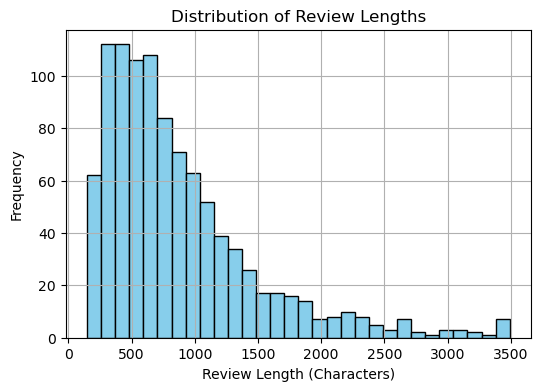

In [14]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram of review lengths
plt.figure(figsize=(6, 4))
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.grid(True)
plt.show()


Visualize the Most Common Words

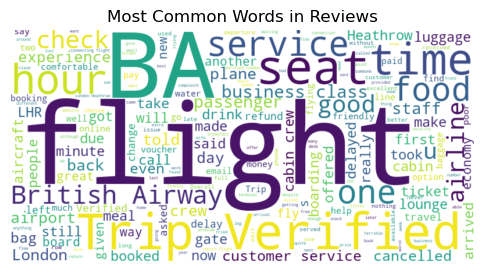

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


Pie Chart of Sentiment (fpr sentiment analysis performance)

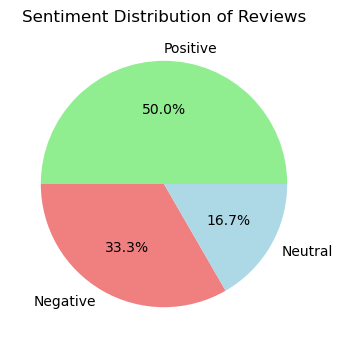

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Example sentiment data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [150, 100, 50]  # Example counts for each sentiment

# Create a pie chart for sentiment distribution
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution of Reviews')
plt.show()
